## Init

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In [ ]:
!pip install tensorflow==2.3.0
!pip install tensorflow-addons==0.13.0
# !pip install numpy==1.19.0
!pip install bezier

## Load from Drive

In [ ]:
!cp -av /content/drive/MyDrive/London/rewriting-activation-maps/rewriting-activation-maps/stylegan2_tf2 /content/

'/content/drive/MyDrive/London/rewriting-activation-maps/rewriting-activation-maps/stylegan2_tf2' -> '/content/stylegan2_tf2'
'/content/drive/MyDrive/London/rewriting-activation-maps/rewriting-activation-maps/stylegan2_tf2/pretrained_leaf' -> '/content/stylegan2_tf2/pretrained_leaf'
'/content/drive/MyDrive/London/rewriting-activation-maps/rewriting-activation-maps/stylegan2_tf2/pretrained_leaf/cuda' -> '/content/stylegan2_tf2/pretrained_leaf/cuda'
'/content/drive/MyDrive/London/rewriting-activation-maps/rewriting-activation-maps/stylegan2_tf2/pretrained_leaf/cuda/ckpt-0.index' -> '/content/stylegan2_tf2/pretrained_leaf/cuda/ckpt-0.index'
'/content/drive/MyDrive/London/rewriting-activation-maps/rewriting-activation-maps/stylegan2_tf2/pretrained_leaf/cuda/checkpoint' -> '/content/stylegan2_tf2/pretrained_leaf/cuda/checkpoint'
'/content/drive/MyDrive/London/rewriting-activation-maps/rewriting-activation-maps/stylegan2_tf2/pretrained_leaf/cuda/ckpt-0.data-00000-of-00001' -> '/content/style

## Save to Drive

In [ ]:
!cp -av /content/stylegan2_tf2 /content/drive/MyDrive/London/rewriting-activation-maps/rewriting-activation-maps/

'/content/stylegan2_tf2/pretrained_leaf/cuda/ckpt-0.index' -> '/content/drive/MyDrive/London/rewriting-activation-maps/rewriting-activation-maps/stylegan2_tf2/pretrained_leaf/cuda/ckpt-0.index'
'/content/stylegan2_tf2/pretrained_leaf/cuda/checkpoint' -> '/content/drive/MyDrive/London/rewriting-activation-maps/rewriting-activation-maps/stylegan2_tf2/pretrained_leaf/cuda/checkpoint'
'/content/stylegan2_tf2/pretrained_leaf/cuda/ckpt-0.data-00000-of-00001' -> '/content/drive/MyDrive/London/rewriting-activation-maps/rewriting-activation-maps/stylegan2_tf2/pretrained_leaf/cuda/ckpt-0.data-00000-of-00001'
'/content/stylegan2_tf2/pretrained_leaf/ref/ckpt-0.data-00000-of-00001' -> '/content/drive/MyDrive/London/rewriting-activation-maps/rewriting-activation-maps/stylegan2_tf2/pretrained_leaf/ref/ckpt-0.data-00000-of-00001'
'/content/stylegan2_tf2/pretrained_leaf/ref/checkpoint' -> '/content/drive/MyDrive/London/rewriting-activation-maps/rewriting-activation-maps/stylegan2_tf2/pretrained_leaf/re

## Load and Restore the Original StyleGAN2 Model on FFHQ

In [ ]:
%cd /content/stylegan2_tf2

/content/stylegan2_tf2


In [ ]:
!nvcc test_nvcc.cu -o test_nvcc -run

CPU says hello.
GPU says hello.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from stylegan2.generator import load_and_restore
from stylegan2.utils import postprocess_images

from PIL import Image
import os, os.path

In [ ]:
# _Set Memory Growth

from tensorflow import config, test
from tensorflow import __version__ as tf_version

physical_devices = config.list_physical_devices('GPU')
config.experimental.set_memory_growth(physical_devices[0], True)

print(physical_devices)
print(tf_version)
print(f'tf is using cuda: {test.is_built_with_cuda()}')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.3.0
tf is using cuda: True


In [ ]:
# generator = load_and_restore('./official-converted/cuda')
# generator = load_and_restore('./pretrained_frea/cuda')
generator = load_and_restore('./pretrained_leaf/cuda')


Generator restored from ./pretrained_leaf/cuda/ckpt-0

conv0, res: 16, shape: (1, 512, 16, 16)
conv1, res: 16, shape: (1, 512, 16, 16)
conv0, res: 32, shape: (1, 512, 32, 32)
conv1, res: 32, shape: (1, 512, 32, 32)
conv0, res: 64, shape: (1, 512, 64, 64)
conv1, res: 64, shape: (1, 512, 64, 64)
conv0, res: 128, shape: (1, 256, 128, 128)
conv1, res: 128, shape: (1, 256, 128, 128)
conv0, res: 256, shape: (1, 128, 256, 256)
conv1, res: 256, shape: (1, 128, 256, 256)
conv0, res: 512, shape: (1, 64, 512, 512)
conv1, res: 512, shape: (1, 64, 512, 512)
conv0, res: 1024, shape: (1, 32, 1024, 1024)
conv1, res: 1024, shape: (1, 32, 1024, 1024)



In [ ]:
seed = 2291
rnd = np.random.RandomState(seed)

latents = rnd.randn(1, generator.z_dim).astype(np.float32)
labels = rnd.randn(1, generator.labels_dim).astype(np.float32)
image_out,intermediate_y = generator([latents, labels], 
                                    ret_w_broadcasted=False, 
                                    training=False, 
                                    truncation_psi=0.6,
                                    return_intermediate_y=True)

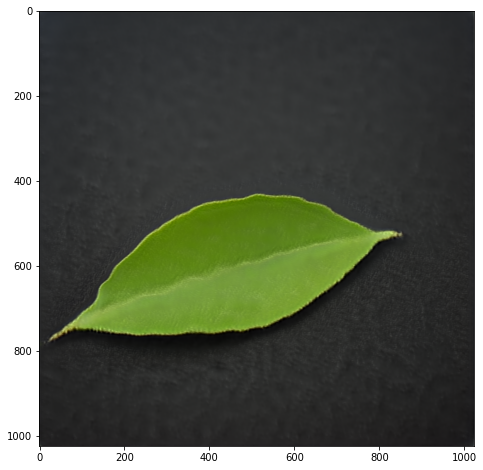

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(postprocess_images(image_out)[0])

## Bezier  

In [ ]:
import bezier

In [ ]:
latents_1 = rnd.randn(1, generator.z_dim).astype(np.float32)
latents_2 = rnd.randn(1, generator.z_dim).astype(np.float32)
latents_3 = rnd.randn(1, generator.z_dim).astype(np.float32)

In [ ]:
latents_1.shape

(1, 512)

In [ ]:
latent_curve = tf.concat([latents_1,latents_2,latents_3],axis=0)
latent_curve_t = tf.transpose(latent_curve,[1,0])
curve = bezier.Curve(latent_curve_t, degree=2)


In [ ]:
latent_curve.shape

TensorShape([3, 512])

In [ ]:
nodes = np.asfortranarray([
    [0.0, 0.625, 1.0],
    [0.0, 0.5  , 0.5],
])
curve_test = bezier.Curve(nodes, degree=2)
t = curve_test.evaluate(10.01)
t


array([[-12.537525],
       [-40.09005 ]])

In [ ]:
# nodes = np.asfortranarray([
#     [0.0, 0.625, 1.0],
#     [0.0, 0.5  , 0.5],
# ])
curve = bezier.Curve(latent_curve_t, degree=2)
curve

<Curve (degree=2, dimension=512)>

In [ ]:
%%time
c = curve.evaluate(1.99)

CPU times: user 78 µs, sys: 8 µs, total: 86 µs
Wall time: 93.5 µs


In [ ]:
c

In [ ]:
c.shape

(512, 1)

In [ ]:
%%time
c = curve.evaluate(0.99)
c_t = tf.transpose(tf.convert_to_tensor(c,dtype=tf.float32),[1,0])

CPU times: user 2.14 ms, sys: 0 ns, total: 2.14 ms
Wall time: 1.61 ms


## Continue

In [ ]:
marked_frea = [1, 10, 110, 312, 223, 229]

In [ ]:
%%time 
dlatents = generator.layers[0]([latents, labels])
w_broadcasted = generator.layers[1](dlatents)
print(f'{dlatents.shape}, {w_broadcasted.shape}')

(1, 512), (1, 18, 512)
CPU times: user 13 ms, sys: 2 ms, total: 15 ms
Wall time: 12.8 ms


In [ ]:
w_broadcasted_t = generator.truncation_trick(w_broadcasted, 0.6)

In [ ]:
from stylegan2.layers.cuda.upfirdn_2d_v2 import upsample_2d, compute_paddings

In [ ]:
k, pad0, pad1 = compute_paddings([1, 3, 3, 1], None, up=True, down=False, is_conv=False)

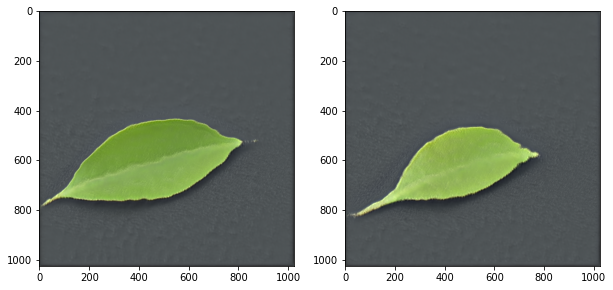

CPU times: user 605 ms, sys: 16.1 ms, total: 621 ms
Wall time: 745 ms


In [ ]:
%%time

inputs = tf.concat([w_broadcasted_t,w_broadcasted],axis=0)

y4 = generator.layers[2].initial_block(inputs[:, 0])
# y4_rgb = generator.layers[2].initial_torgb([y4, inputs[:, 0]])

y8 = generator.layers[2].blocks[0].conv_0([y4,inputs[:, 0]])
y8 = generator.layers[2].blocks[0].apply_noise_0(y8)
y8 = generator.layers[2].blocks[0].apply_bias_act_0(y8)
y8_1 = generator.layers[2].blocks[0].conv_1([y8,inputs[:, 0]])
y8_1 = generator.layers[2].blocks[0].apply_noise_1(y8_1)
y8_1 = generator.layers[2].blocks[0].apply_bias_act_1(y8_1)

# y8_rgb = upsample_2d(y4_rgb, generator.layers[2].blocks[0].res//2, pad0, pad1, k)
# y8_rgb = y8_rgb + generator.layers[2].torgbs[0]([y8_1, inputs[:, 0]])

y16 = generator.layers[2].blocks[1].conv_0([y8_1,inputs[:, 0]])
y16 = generator.layers[2].blocks[1].apply_noise_0(y16)
y16 = generator.layers[2].blocks[1].apply_bias_act_0(y16)
y16_1_cov = generator.layers[2].blocks[1].conv_1([y16,inputs[:, 0]])
y16_1 = generator.layers[2].blocks[1].apply_noise_1(y16_1_cov)
y16_1 = generator.layers[2].blocks[1].apply_bias_act_1(y16_1)

# y16_rgb = upsample_2d(y8_rgb, generator.layers[2].blocks[1].res//2, pad0, pad1, k)
# y16_rgb = y16_rgb + generator.layers[2].torgbs[1]([y16_1, inputs[:, 0]])

y32 = generator.layers[2].blocks[2].conv_0([y16_1,inputs[:, 0]])
y32 = generator.layers[2].blocks[2].apply_noise_0(y32)
y32 = generator.layers[2].blocks[2].apply_bias_act_0(y32)
y32_1 = generator.layers[2].blocks[2].conv_1([y32,inputs[:, 0]])
y32_1 = generator.layers[2].blocks[2].apply_noise_1(y32_1)
y32_1 = generator.layers[2].blocks[2].apply_bias_act_1(y32_1)

# y32_rgb = upsample_2d(y16_rgb, generator.layers[2].blocks[2].res//2, pad0, pad1, k)
# y32_rgb = y32_rgb + generator.layers[2].torgbs[2]([y32_1, inputs[:, 0]])

y64 = generator.layers[2].blocks[3]([y32_1,inputs[:, 0],inputs[:, 0]])
# y64_rgb = upsample_2d(y32_rgb, generator.layers[2].blocks[3].res//2, pad0, pad1, k)
# y64_rgb = y64_rgb + generator.layers[2].torgbs[3]([y64, inputs[:, 0]])

y128 = generator.layers[2].blocks[4]([y64,inputs[:, 0],inputs[:, 0]])
# y128_rgb = upsample_2d(y64_rgb, generator.layers[2].blocks[4].res//2, pad0, pad1, k)
y128_rgb = generator.layers[2].torgbs[4]([y128, inputs[:, 0]])

y256 = generator.layers[2].blocks[5]([y128,inputs[:, 0],inputs[:, 0]])
y256_rgb = upsample_2d(y128_rgb, generator.layers[2].blocks[5].res//2, pad0, pad1, k)
y256_rgb = y256_rgb + generator.layers[2].torgbs[5]([y256, inputs[:, 0]])
# y256_rgb = generator.layers[2].torgbs[5]([y256, inputs[:, 0]])

y512 = generator.layers[2].blocks[6]([y256,inputs[:, 0],inputs[:, 0]])
y512_rgb = upsample_2d(y256_rgb, generator.layers[2].blocks[6].res//2, pad0, pad1, k)
y512_rgb = y512_rgb + generator.layers[2].torgbs[6]([y512, inputs[:, 0]])

y1024 = generator.layers[2].blocks[7]([y512,inputs[:, 0],inputs[:, 0]])
y1024_rgb = upsample_2d(y512_rgb, generator.layers[2].blocks[7].res//2, pad0, pad1, k)
y_rgb = y1024_rgb + generator.layers[2].torgbs[7]([y1024, inputs[:, 0]])

# y_rgb = generator.layers[2].torgbs[-1]([y1024, inputs[:, 0]])

image_post = postprocess_images(y_rgb).numpy()

plt.figure(figsize=(21,11))
for i,img in enumerate(image_post):
    plt.subplot(1,4,i+1)
    plt.imshow(img)
plt.show()


In [ ]:
image_post = postprocess_images(y256_rgb).numpy()
plt.imshow(image_post[0])

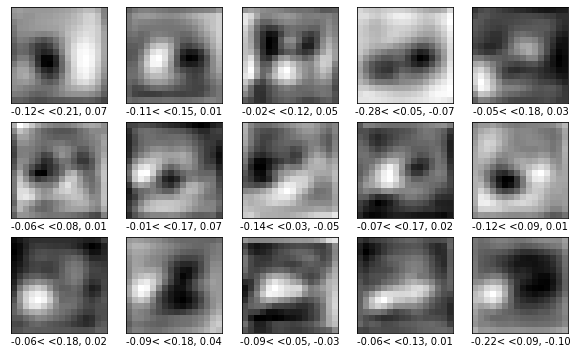

In [ ]:
# _Plot 25 images by matplotlib.pyplot

plt.figure(figsize=(10,6))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(y16_1_cov[0][i], cmap='gray')
    plt.xlabel(f'{np.min(y16_1_cov[0][i]):.2f}< <{np.max(y16_1_cov[0][i]):.2f}, {np.mean(y16_1_cov[0][i]):.2f}')
plt.show()

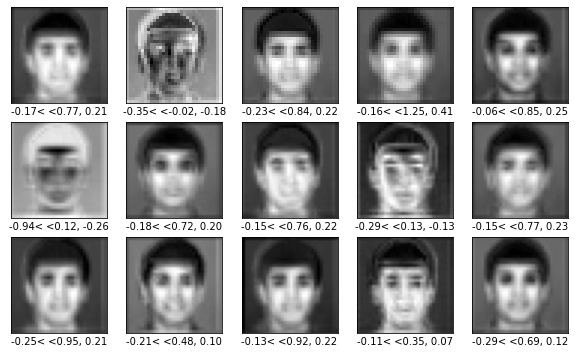

In [ ]:
# _Plot 25 images by matplotlib.pyplot

plt.figure(figsize=(10,6))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(features_2[0][i], cmap='gray')
    plt.xlabel(f'{np.min(features_2[0][i]):.2f}< <{np.max(features_2[0][i]):.2f}, {np.mean(features_2[0][i]):.2f}')
plt.show()

## Helper Model

In [ ]:
inputs_re = tf.keras.Input((256, 256, 3))

# x = tf.keras.layers.Conv2D(16, (3,3), strides=(2,2), padding='same')(inputs_re)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.LeakyReLU(alpha=0.2)(x) # 16,512,512

# x = tf.keras.layers.Conv2D(32, (3,3), strides=(2,2), padding='same')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.LeakyReLU(alpha=0.2)(x) # 32,256,256
# x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(inputs_re)
# x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x) # 3,256,256

x = tf.keras.layers.Conv2D(64, (3,3), strides=(2,2), padding='same')(inputs_re)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU(alpha=0.2)(x) # 64,128,128

x = tf.keras.layers.Conv2D(128, (3,3), strides=(2,2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU(alpha=0.2)(x) # 128,64,64

x = tf.keras.layers.Conv2D(256, (3,3), strides=(2,2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU(alpha=0.2)(x) # 512,32,32

x = tf.keras.layers.Conv2D(512, (3,3), strides=(2,2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU(alpha=0.2)(x) # 512,16,16

# x = tf.keras.layers.Conv2D(256, (3,3), strides=(2,2), padding='same')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.LeakyReLU(alpha=0.2)(x) # 512,16,16

# x = tf.keras.layers.Conv2D(256, (3,3), strides=(2,2), padding='same')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.LeakyReLU(alpha=0.2)(x) # 512,8,8

x = tf.keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU(alpha=0.2)(x) # 512,32,32

x = tf.keras.layers.Conv2D(512, (1,1), padding='same')(x)

model_re = tf.keras.Model(inputs=inputs_re, outputs=x)

In [ ]:
model_re.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization_18 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
leaky_re_lu_218 (LeakyReLU)  (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
batch_normalization_19 (Batc (None, 64, 64, 128)       512       
_________________________________________________________________
leaky_re_lu_219 (LeakyReLU)  (None, 64, 64, 128)      

In [ ]:
def rewrite_and_generate(new_model, img, broadcasted, output_res = 1024):
  # img: BHWC

  pred = new_model.predict(img)
  features_2 = tf.transpose(pred, [0,3,1,2])

  inputs=broadcasted

  y16_1 = generator.layers[2].blocks[1].apply_noise_1(features_2)
  y16_1 = generator.layers[2].blocks[1].apply_bias_act_1(y16_1)

  y32 = generator.layers[2].blocks[2].conv_0([y16_1,inputs[:, 0]])
  y32 = generator.layers[2].blocks[2].apply_noise_0(y32)
  y32 = generator.layers[2].blocks[2].apply_bias_act_0(y32)
  y32_1 = generator.layers[2].blocks[2].conv_1([y32,inputs[:, 0]])
  y32_1 = generator.layers[2].blocks[2].apply_noise_1(y32_1)
  y32_1 = generator.layers[2].blocks[2].apply_bias_act_1(y32_1)

  y64 = generator.layers[2].blocks[3]([y32_1,inputs[:, 0],inputs[:, 0]])
  y128 = generator.layers[2].blocks[4]([y64,inputs[:, 0],inputs[:, 0]])

  y128_rgb = generator.layers[2].torgbs[4]([y128, inputs[:, 0]])

  y256 = generator.layers[2].blocks[5]([y128,inputs[:, 0],inputs[:, 0]])
  y256_rgb = upsample_2d(y128_rgb, generator.layers[2].blocks[5].res//2, pad0, pad1, k)
  y256_rgb = y256_rgb + generator.layers[2].torgbs[5]([y256, inputs[:, 0]])
  # y256_rgb = generator.layers[2].torgbs[5]([y256, inputs[:, 0]])

  y512 = generator.layers[2].blocks[6]([y256,inputs[:, 0],inputs[:, 0]])
  y512_rgb = upsample_2d(y256_rgb, generator.layers[2].blocks[6].res//2, pad0, pad1, k)
  y512_rgb = y512_rgb + generator.layers[2].torgbs[6]([y512, inputs[:, 0]])

  y1024 = generator.layers[2].blocks[7]([y512,inputs[:, 0],inputs[:, 0]])
  y1024_rgb = upsample_2d(y512_rgb, generator.layers[2].blocks[7].res//2, pad0, pad1, k)
  y_rgb = y1024_rgb + generator.layers[2].torgbs[7]([y1024, inputs[:, 0]])

  if output_res==1024:
    image_post = postprocess_images(y_rgb).numpy()
  elif output_res==512:
    y_small = tf.keras.layers.MaxPool2D(pool_size=(2,2),data_format='channels_first')(y_rgb)
    image_post = postprocess_images(y_small).numpy()
  elif output_res==256:
    y_small = tf.keras.layers.MaxPool2D(pool_size=(2,2),data_format='channels_first')(y_rgb)
    y_small = tf.keras.layers.MaxPool2D(pool_size=(2,2),data_format='channels_first')(y_small)
    image_post = postprocess_images(y_small).numpy()
  else:
    image_post = postprocess_images(y_rgb).numpy()
  
  return image_post #BHWC

In [ ]:
def load_img_to_tensor(path,size=1024):
  img = Image.open(path)
  w,h = img.size

  if w==h:
    img = img.resize((size,size)).convert('RGB')

  elif w>h:
    img = img.crop(((w-h)/2,0,(w-h)/2+h,h)).resize((size,size)).convert('RGB')

  elif h>w:
    img = img.crop((0,(h-w)/2,w,(h-w)/2+w)).resize((size,size)).convert('RGB')
  
  loaded = tf.convert_to_tensor(np.array(img),dtype=tf.float32)/127.5 -1.0
  return tf.expand_dims(loaded,axis=0)

def test_generator(img_path,new_model,i = 0, input_size=256):
  img = load_img_to_tensor(img_path,input_size)
  processes = rewrite_and_generate(new_model,img,w_broadcasted_t)
    
  fig = plt.figure(figsize=(7, 7))

  # for i in range(predictions.shape[0]):
  #     plt.subplot(3, 5, i+1)
  #     plt.imshow(predictions[i, :, :, :] * 0.5 + 0.5)
  #     plt.axis('off')
  plt.imshow(processes[0])

  plt.savefig(f'/content/image_at_step_{i:04d}.jpg')
  plt.show()


In [ ]:
from IPython.display import clear_output

def forward(w_broadcasted, generator):
  inputs = w_broadcasted

  y4 = generator.layers[2].initial_block(inputs[:, 0])

  y8 = generator.layers[2].blocks[0].conv_0([y4,inputs[:, 0]])
  y8 = generator.layers[2].blocks[0].apply_noise_0(y8)
  y8 = generator.layers[2].blocks[0].apply_bias_act_0(y8)
  y8_1 = generator.layers[2].blocks[0].conv_1([y8,inputs[:, 0]])
  y8_1 = generator.layers[2].blocks[0].apply_noise_1(y8_1)
  y8_1 = generator.layers[2].blocks[0].apply_bias_act_1(y8_1)

  y16 = generator.layers[2].blocks[1].conv_0([y8_1,inputs[:, 0]])
  y16 = generator.layers[2].blocks[1].apply_noise_0(y16)
  y16 = generator.layers[2].blocks[1].apply_bias_act_0(y16)
  y16_1_cov = generator.layers[2].blocks[1].conv_1([y16,inputs[:, 0]])
  y16_1 = generator.layers[2].blocks[1].apply_noise_1(y16_1_cov)
  y16_1 = generator.layers[2].blocks[1].apply_bias_act_1(y16_1)

  y32 = generator.layers[2].blocks[2].conv_0([y16_1,inputs[:, 0]])
  y32 = generator.layers[2].blocks[2].apply_noise_0(y32)
  y32 = generator.layers[2].blocks[2].apply_bias_act_0(y32)
  y32_1 = generator.layers[2].blocks[2].conv_1([y32,inputs[:, 0]])
  y32_1 = generator.layers[2].blocks[2].apply_noise_1(y32_1)
  y32_1 = generator.layers[2].blocks[2].apply_bias_act_1(y32_1)

  y64 = generator.layers[2].blocks[3]([y32_1,inputs[:, 0],inputs[:, 0]])
  y128 = generator.layers[2].blocks[4]([y64,inputs[:, 0],inputs[:, 0]])
  y128_rgb = generator.layers[2].torgbs[4]([y128, inputs[:, 0]])

  y256 = generator.layers[2].blocks[5]([y128,inputs[:, 0],inputs[:, 0]])
  y256_rgb = upsample_2d(y128_rgb, generator.layers[2].blocks[5].res//2, pad0, pad1, k)
  y256_rgb = y256_rgb + generator.layers[2].torgbs[5]([y256, inputs[:, 0]])

  y512 = generator.layers[2].blocks[6]([y256,inputs[:, 0],inputs[:, 0]])
  y512_rgb = upsample_2d(y256_rgb, generator.layers[2].blocks[6].res//2, pad0, pad1, k)
  y512_rgb = y512_rgb + generator.layers[2].torgbs[6]([y512, inputs[:, 0]])

  y1024 = generator.layers[2].blocks[7]([y512,inputs[:, 0],inputs[:, 0]])
  y1024_rgb = upsample_2d(y512_rgb, generator.layers[2].blocks[7].res//2, pad0, pad1, k)
  y_rgb = y1024_rgb + generator.layers[2].torgbs[7]([y1024, inputs[:, 0]])

  x_train_1024 = tf.transpose(y_rgb, [0,2,3,1])

  x_train_1024 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x_train_1024)
  x_train = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x_train_1024)

  y_train = tf.transpose(y16_1_cov, [0,2,3,1])

  return x_train, y_train

def train_epochs(model_re, generator, epochs_num, batch_num, batch_per_epo, latent_dim = 512):
  n_steps = batch_per_epo * epochs_num
  seed = 1
  rnd = np.random.RandomState(seed)
  loss = []

  for i in range(n_steps):
    # latent points
    latents = rnd.randn(batch_num, 512).astype(np.float32)
    labels = rnd.randn(batch_num, 0).astype(np.float32)

    dlatents = generator.layers[0]([latents, labels])
    w_broadcasted = generator.layers[1](dlatents)
    # w_broadcasted = generator.truncation_trick(w_broadcasted, 0.6)
    # train_x_batch
    # train_y_batch
    train_x_batch, train_y_batch = forward(w_broadcasted, generator)

    # train on batch
    g_loss = model_re.train_on_batch(train_x_batch, train_y_batch)
    loss.append(g_loss)

    if i%10 == 0:
      clear_output(wait=True)
      print(f'step: {i:03}, loss: [{g_loss[0]:.4f}, {g_loss[1]:.4f}]')
      test_generator('/content/stylegan2_tf2/test_imgs/Untitled-4.jpg',model_re,i)
    elif i%1 == 0:
      print(f'step: {i:03}, loss: [{g_loss[0]:.4f}, {g_loss[1]:.4f}]')

  return loss

In [ ]:
model_re.compile(optimizer = 'Adam', loss = tf.keras.metrics.mean_squared_error, metrics = ['accuracy'] )

step: 1490, loss: [0.0110, 0.1118]


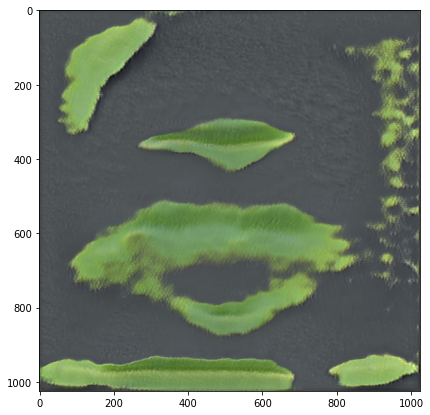

step: 1491, loss: [0.0090, 0.1104]
step: 1492, loss: [0.0096, 0.1436]
step: 1493, loss: [0.0086, 0.1394]
step: 1494, loss: [0.0087, 0.1208]
step: 1495, loss: [0.0062, 0.1628]
step: 1496, loss: [0.0106, 0.1550]
step: 1497, loss: [0.0080, 0.1414]
step: 1498, loss: [0.0088, 0.1313]
step: 1499, loss: [0.0074, 0.1465]


In [ ]:
losses = train_epochs(model_re, generator, epochs_num=15, batch_num=16, batch_per_epo=100, latent_dim = 512)

In [ ]:
checkpoint_path = "/content/stylegan2_tf2/model_rebuild/training_leaf_15_1/"
# !mkdir {checkpoint_path}
model_re.save(checkpoint_path)

INFO:tensorflow:Assets written to: /content/stylegan2_tf2/model_rebuild/training_leaf_15_1/assets


In [ ]:
!ffmpeg -framerate 24 -i /content/image_at_step_%03d0.jpg /content/stylegan2_tf2/output_frea.mp4

In [ ]:
new_model = tf.keras.models.load_model('/content/stylegan2_tf2/model_rebuild/training_10')

In [ ]:
new_model = tf.keras.models.load_model('/content/stylegan2_tf2/model_rebuild/training_leaf_15_1/')

In [ ]:
new_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization_4 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
leaky_re_lu_204 (LeakyReLU)  (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
batch_normalization_5 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
leaky_re_lu_205 (LeakyReLU)  (None, 64, 64, 128)      

In [ ]:
img = load_img_to_tensor('/content/stylegan2_tf2/test_imgs/Untitled-4.jpg',256)
print(img.shape)

(1, 256, 256, 3)


In [ ]:
seed = 2291
rnd = np.random.RandomState(seed)
latents = rnd.randn(1, generator.z_dim).astype(np.float32)
labels = rnd.randn(1, generator.labels_dim).astype(np.float32)

dlatents = generator.layers[0]([latents, labels])
w_broadcasted = generator.layers[1](dlatents)

w_broadcasted_t = generator.truncation_trick(w_broadcasted, 0.6)

In [ ]:
for w in w_broadcasted[0]:
  print(f'{np.min(w)} {np.max(w)}')

In [ ]:
generator.layers[0]

In [ ]:
pred = new_model.predict(img)
features_2 = tf.transpose(pred, [0,3,1,2])

In [ ]:
features_2.shape

TensorShape([1, 512, 32, 32])

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import time

import io,os
from PIL import Image
import numpy as np


In [ ]:
js_setup_camera = Javascript('''

  const capture_size = 256

  var table = document.createElement('table');
  var td_right = document.createElement('td');
  
  var td_left = document.createElement('td');
  table.appendChild(td_left);
  table.appendChild(td_right);

  var video = document.createElement('video');
  video.style.display = 'block';

  var canvas = document.createElement('canvas');
  var return_canvas = document.createElement('img');

  var stream
  async function setupCamera(video, table, stream, canvas, return_canvas){
    stream = await navigator.mediaDevices.getUserMedia({video: { width: capture_size, height: capture_size }});
    document.body.appendChild(table);
    td_left.appendChild(video);
    video.srcObject = stream;
    await video.play();

    await google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
    canvas.width = video.videoWidth;
    canvas.height = video.videoHeight;
    canvas.getContext('2d').drawImage(video, 0, 0);

    td_right.appendChild(return_canvas);
  }
  setupCamera(video, table, stream, canvas, return_canvas);
  var listenerChannel = new BroadcastChannel('video_controller');
  listenerChannel.onmessage = (event) => {
    console.log('stop video');
    video.srcObject.getVideoTracks()[0].stop();
  };

  async function extract_frame(quality, return_bytes){
    await canvas.getContext('2d').drawImage(video, 0, 0);
    return_canvas.src = return_bytes
    return canvas.toDataURL('image/jpeg', quality);
    // return 0
  }

  
''')

def pil_to_bytes(img,return_quality=75):
  iobuf = io.BytesIO()
  img.save(iobuf, format='JPEG', quality=return_quality)
  return f'data:image/jpeg;base64,{str(b64encode(iobuf.getvalue()), "utf-8")}'


In [ ]:
def update_latent(curve,percent,labels):

  curve_point = curve.evaluate(percent)
  c_t = tf.transpose(tf.convert_to_tensor(curve_point,dtype=tf.float32),[1,0])  

  dlatents = generator.layers[0]([c_t, labels])
  w_broadcasted = generator.layers[1](dlatents)
  # print(f'{dlatents.shape}, {w_broadcasted.shape}')

  w_broadcasted_t = generator.truncation_trick(w_broadcasted, 0.6)

  return w_broadcasted_t

In [ ]:
data

In [ ]:
display(js_setup_camera)
quality = 0.3
time.sleep(2)
return_size = 1024
return_quality = 50 # [25,75)
interpolation_step = 25

img = np.zeros((return_size,return_size,3))
return_PIL = Image.fromarray(img, 'RGB')
return_bytes = pil_to_bytes(return_PIL)

for i in range(1000):
  exc_data = f'extract_frame({quality}, "{return_bytes}")'
  data = eval_js(exc_data)
  binary = b64decode(data.split(',')[1])
  # img = np.array(Image.open(io.BytesIO(binary)).resize((return_size,return_size)))
  img = np.array(Image.open(io.BytesIO(binary))) # HWC 255 -> 
  
  # do something here: 

  # curve_broadcasted = update_latent(curve, i/100, labels)

  img = tf.convert_to_tensor(img,dtype=tf.float32)/127.5 - 1.0
  # processed = rewrite_and_generate(new_model, tf.expand_dims(img,axis=0), curve_broadcasted, output_res=return_size)
  processed = rewrite_and_generate(model_re, tf.expand_dims(img,axis=0), w_broadcasted_t, output_res=return_size)
  
  # -> BHWC 255
  return_PIL = Image.fromarray(processed[0],'RGB')
  return_bytes = pil_to_bytes(return_PIL, return_quality)


<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

In [ ]:
%%javascript
const senderChannel = new BroadcastChannel('video_controller');
senderChannel.postMessage('stop');

<IPython.core.display.Javascript object>

In [ ]:
processes = rewrite_and_generate(new_model,img,w_broadcasted_t)

In [ ]:
processes.shape

(1, 256, 256, 3)

In [ ]:
# from IPython.display import display, Javascript, JSON
# from google.colab import output

import IPython
from google.colab import output
from base64 import b64decode, b64encode
import time

import io,os
from PIL import Image
import numpy as np


In [ ]:
def GenerateOutput(data_0=0,
                   data_1=0,
                   data_2=0,
                   data_3=0,
                   data_4=0,
                   data_5=0,
                   data_6=0,
                   data_7=0,
                   data_8=0,
                   data_9=0):
  # this_img_data = Image.fromarray(img_data_x[index], 'RGB')
  # results = pil_to_bytes(this_img_data,return_quality=75)
  return IPython.display.JSON({'result_0': f'{data_0}',
                              'result_1': f'{data_1}',
                              'result_2': f'{data_2}',
                              'result_3': f'{data_3}',
                              'result_4': f'{data_4}',
                              'result_5': f'{data_5}',
                              'result_6': f'{data_6}',
                              'result_7': f'{data_7}',
                              'result_8': f'{data_8}',
                              'result_9': f'{data_9}',
                              })

output.register_callback('notebook.GenerateOutput', GenerateOutput)

In [ ]:
%%javascript

const capture_size = 1024

var table = document.createElement('table');
var td_right = document.createElement('td');

var td_left = document.createElement('td');
table.appendChild(td_left);
table.appendChild(td_right);

var video = document.createElement('video');
video.style.display = 'block';

var canvas = document.createElement('canvas');
var return_canvas = document.createElement('img');

var stream
async function setupCamera(video, table, stream, canvas, return_canvas){
  stream = await navigator.mediaDevices.getUserMedia({video: { width: capture_size, height: capture_size }});
  document.body.appendChild(table);
  td_left.appendChild(video);
  video.srcObject = stream;
  await video.play();

  await google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
  canvas.width = video.videoWidth;
  canvas.height = video.videoHeight;
  canvas.getContext('2d').drawImage(video, 0, 0);

  td_right.appendChild(return_canvas);
}
setupCamera(video, table, stream, canvas, return_canvas);
var listenerChannel = new BroadcastChannel('video_controller');
listenerChannel.onmessage = (event) => {
  console.log('stop video');
  video.srcObject.getVideoTracks()[0].stop();
};

async function extract_frame(quality, return_bytes){
  await canvas.getContext('2d').drawImage(video, 0, 0);
  return_canvas.src = return_bytes
  return canvas.toDataURL('image/jpeg', quality);
  // return 0
}


var captured_buffer = { 'data_0':0,
                        'data_1':1,
                        'data_2':2,
                        'data_3':3,
                        'data_4':4,
                        'data_5':0,
                        'data_6':1,
                        'data_7':2,
                        'data_8':3,
                        'data_9':4
                      }
var received_buffer = { 'result_0':0,
                        'result_1':0,
                        'result_2':0,
                        'result_3':0,
                        'result_4':0,
                        'result_5':0,
                        'result_6':0,
                        'result_7':0,
                        'result_8':0,
                        'result_9':0,
                        'result_10':0,
                        'result_11':0,
                        'result_12':0,
                        'result_13':0,
                        'result_14':0,
                        'result_15':0,
                        'result_16':0,
                        'result_17':0,
                        'result_18':0,
                        'result_19':0
                      }

var send_count = 0

var frame_pointer = 0
var display_pointer = 0

var pending_pointer = 0
var pending_count = 0

var display_count = 0
var received_count = 0

var div = document.createElement('div')
document.body.appendChild(div)
var div_2 = document.createElement('div')
document.body.appendChild(div_2)

function captureFrame() {
  canvas.getContext('2d').drawImage(video, 0, 0);
  captured_buffer['data_'+frame_pointer] = canvas.toDataURL('image/jpeg', 0.2);

  frame_pointer += 1
  if (frame_pointer==4){
    frame_pointer = 0
  }
  send_count+=1
  div_2.innerHTML = send_count
}

async function sendBuffer() {

  const received = await google.colab.kernel.invokeFunction(
    'notebook.GenerateOutput', // The callback name.
    [], // The arguments.
    captured_buffer
  );
  // pending_count += 10
  
  for (let p = 0; p < 4; p++){
    var pp = display_pointer + pending_count + p
    if (pp>=20){
      pp = pp-19
    }
    // 18 19 20 21 22 23 24
    // 18 19 0  1  2  3  4


    received_buffer['result_'+pp] = received.data['application/json']['result_'+p];
    // pending_pointer += 1;
    received_count += 1;
    // if (pending_pointer==20){
    //   pending_pointer = 0
    // }
  }
  pending_count += 4


  // received_buffer = received.data['application/json'];
  // display_pointer += 10
}

function updateDisplay() {
  if (pending_count > 0){
    return_canvas.src = received_buffer['result_'+display_pointer]
    display_count += 1;
    display_pointer += 1;
    pending_count -= 1;
    if (display_pointer==20){
      display_pointer = 0
    }
  }
  div.innerHTML = display_pointer + ' ' + pending_count + ' ' + display_count + ' '+received_count


}

var send_buffer_interval = setInterval(sendBuffer, 1000);
var capture_frame_interval = setInterval(captureFrame, 250);
var update_display_interval = setInterval(updateDisplay, 250);

In [ ]:
%%javascript

var captured_buffer = { 'data_0':0,
                        'data_1':1,
                        'data_2':2,
                        'data_3':3,
                        'data_4':4,
                      }

console.log(captured_buffer['data_'+1])


<IPython.core.display.Javascript object>

In [ ]:
%%javascript

// clearInterval(send_buffer_interval)
// clearInterval(capture_frame_interval)
// clearInterval(update_display_interval)

const senderChannel = new BroadcastChannel('video_controller');
senderChannel.postMessage('stop');

<IPython.core.display.Javascript object>